In [1]:
import awkward as ak
import uproot 
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
hep.style.use("CMS")

In [19]:
output_dir = "/eos/home-g/gallim/www/plots/Hgg/NanoMicroCompare"

In [2]:
nanoaod_files_dir = "/work/gallim/devel/HiggsDNA_studies/out/GluGluHToGG_M125_TuneCP5_13TeV-amcatnloFXFX-pythia8"
nanoaod_arr = ak.from_parquet(nanoaod_files_dir)

In [3]:
nanoaod_arr

<Array [{lead_charge: 0, ... run: 1}] type='1069204 * {"lead_charge": ?int32, "l...'>

In [4]:
microaod_files_dir = "/pnfs/psi.ch/cms/trivcat/store/user/gallim/root_files/nanoaod_comparison"
microaod_arr = uproot.concatenate(["{}/*.root:diphotonDumper/trees/ggH_125_13TeV_All_$SYST".format(microaod_files_dir)])

In [5]:
microaod_arr

<Array [{candidate_id: 0, ... puweight: 1}] type='1019840 * {"candidate_id": int...'>

In [6]:
min_events = min(len(nanoaod_arr), len(microaod_arr))

In [7]:
nanoaod_arr

<Array [{lead_charge: 0, ... run: 1}] type='1069204 * {"lead_charge": ?int32, "l...'>

In [8]:
microaod_arr

<Array [{candidate_id: 0, ... puweight: 1}] type='1019840 * {"candidate_id": int...'>

In [14]:
columns = {
    "lead_mass": "mass",
    "lead_mvaID": "lead_mva"
}

columns = [
    {
        "nano_col": "lead_mvaID",
        "micro_col": "lead_mva",
        "bins": 100,
        "range": (0, 1),
        "var": "lead PhoIdMVA"
    },
    {
        "nano_col": "sublead_mvaID",
        "micro_col": "sublead_mva",
        "bins": 100,
        "range": (0, 1),
        "var": "sublead PhoIdMVA"
    },
    {
        "nano_col": "lead_pt",
        "micro_col": "leadPt",
        "bins": 100,
        "range": (0, 200),
        "var": "lead $p_{t}$"
    },
    {
        "nano_col": "sublead_pt",
        "micro_col": "subleadPt",
        "bins": 100,
        "range": (0, 200),
        "var": "sublead $p_{t}$"
    },
    {
        "nano_col": "lead_eta",
        "micro_col": "lead_eta",
        "bins": 100,
        "range": (-3, 3),
        "var": "lead $\eta$"
    },
    {
        "nano_col": "sublead_eta",
        "micro_col": "sublead_eta",
        "bins": 100,
        "range": (-3, 3),
        "var": "sublead $\eta$"
    },
    {
        "nano_col": "lead_phi",
        "micro_col": "lead_phi",
        "bins": 100,
        "range": (-3, 3),
        "var": "lead $\phi$"
    },
    {
        "nano_col": "sublead_phi",
        "micro_col": "sublead_phi",
        "bins": 100,
        "range": (-3, 3),
        "var": "sublead $\phi$"
    },
]

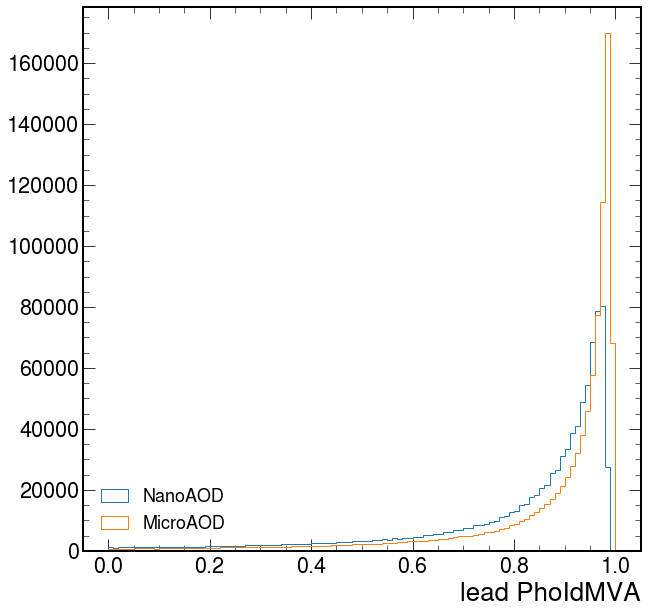

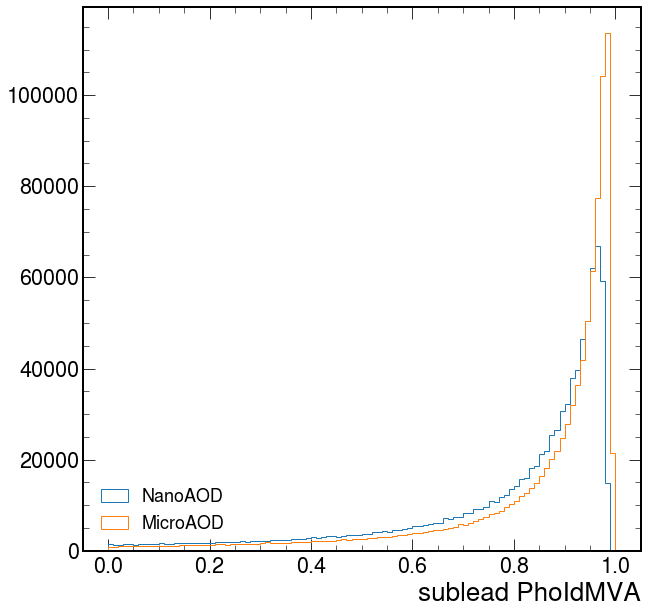

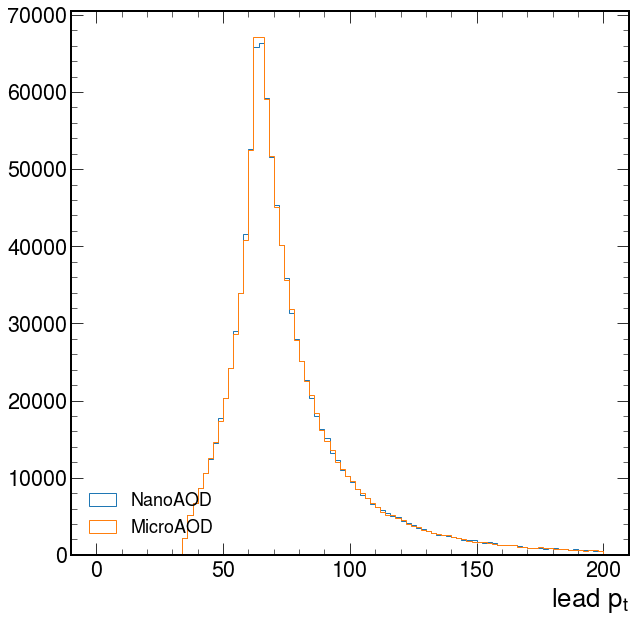

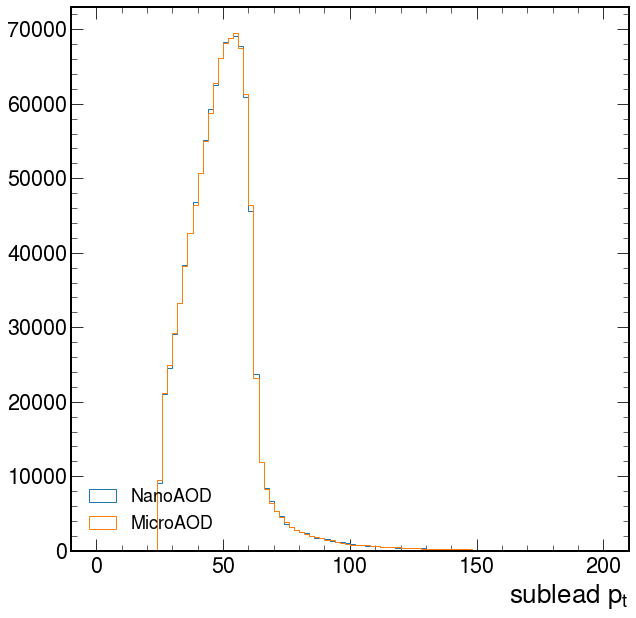

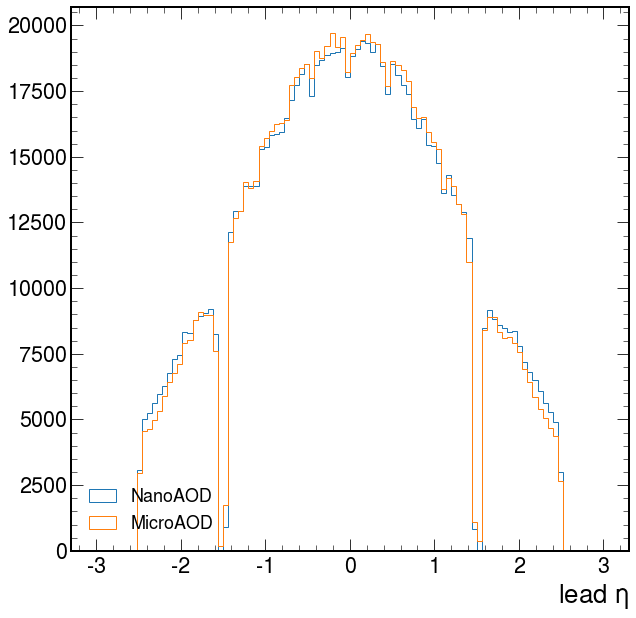

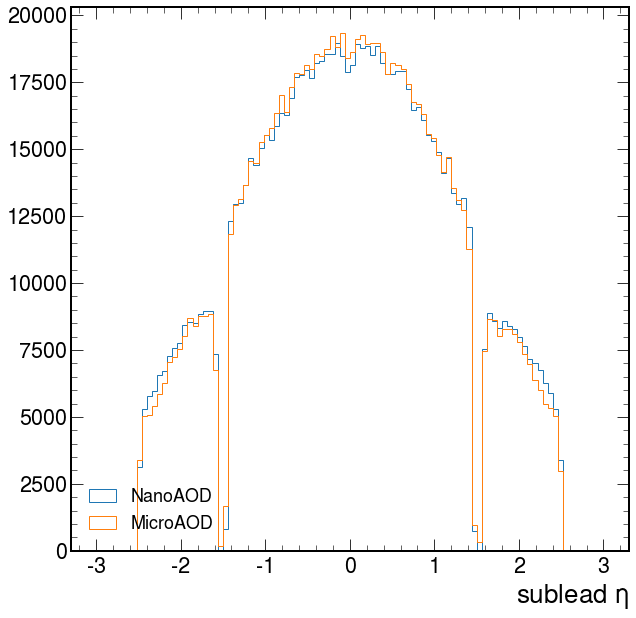

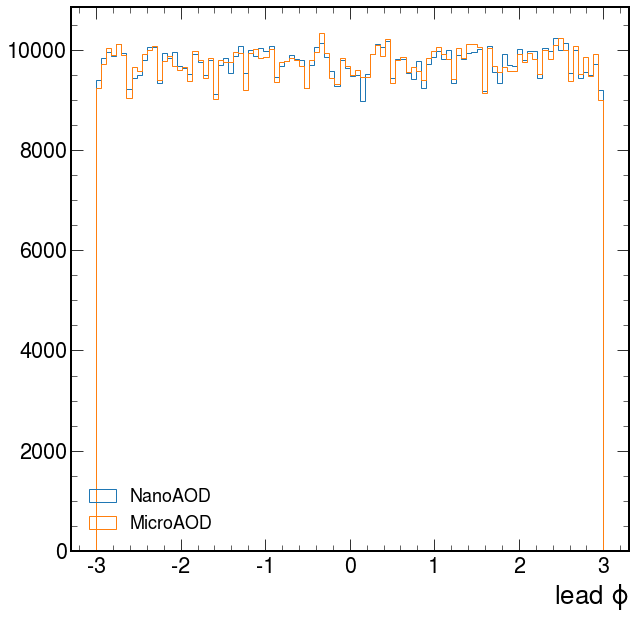

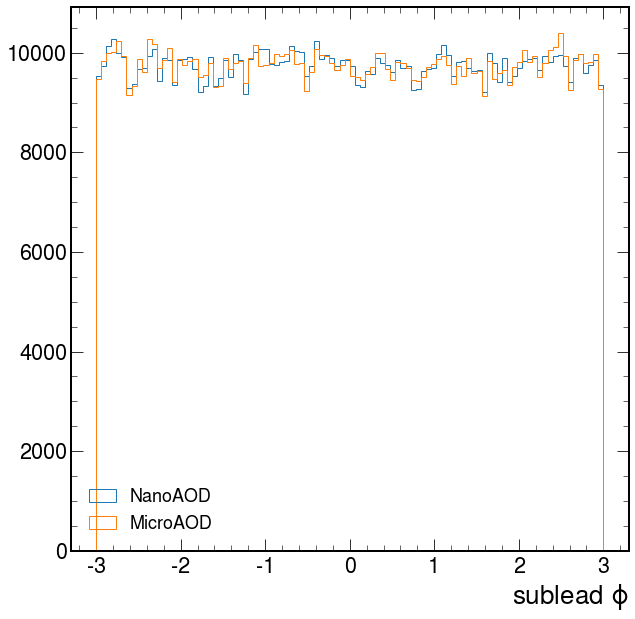

In [20]:
for column in columns:
    fig, ax = plt.subplots()
    
    nano_col = np.random.choice(nanoaod_arr[column["nano_col"]], min_events)
    micro_col = np.random.choice(microaod_arr[column["micro_col"]], min_events)
    
    ax.hist(nano_col, bins=column["bins"], range=column["range"], histtype="step", label="NanoAOD")
    ax.hist(micro_col, bins=column["bins"], range=column["range"], histtype="step", label="MicroAOD")
    
    ax.set_xlabel(column["var"])
    ax.legend(fontsize=18, loc="lower left")
    
    fig.savefig("{}/{}.png".format(output_dir, column["nano_col"]), bbox_inches='tight')
    fig.savefig("{}/{}.pdf".format(output_dir, column["nano_col"]), bbox_inches='tight')

In [ ]:
microaod_arr.lead

In [ ]:
nanoaod_arr.lead_eta